# Using ffn library to measure stocks (Dogs of the Dow 2022) performance
Reference: https://pmorissette.github.io/ffn/index.html

In [1]:
import ffn
import pandas as pd
import yfinance as yf
%matplotlib inline

# from pandas_datareader import data as pdr

# Use below to bypass the "TypeError: string indices must be integers" when calling ffn.get
yf.pdr_override() 

## Data Preparation

In [2]:
dogs_stocks_df = pd.read_csv("data/dogsofdow2022.csv")

dogs_stocks_list = dogs_stocks_df['Ticker'].values.tolist()
print(dogs_stocks_list)

dogs_stocks_str = ",".join(dogs_stocks_list)
dogs_stocks_str

prices = ffn.get(dogs_stocks_str, start='2022-01-01', end='2023-01-01')
print(prices.head())

['DOW', 'VZ', 'IBM', 'CVX', 'WBA', 'MRK', 'AMGN', 'MMM', 'KO', 'INTC', 'JPM', 'JNJ', 'CSCO', 'TRV', 'CAT', 'PG', 'GS', 'MCD', 'HON', 'HD', 'WMT', 'UNH', 'AXP', 'MSFT', 'NKE', 'V', 'AAPL', 'BA', 'CRM', 'DIS']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

## Data Manipulation

#### How all these securities performed over the period?

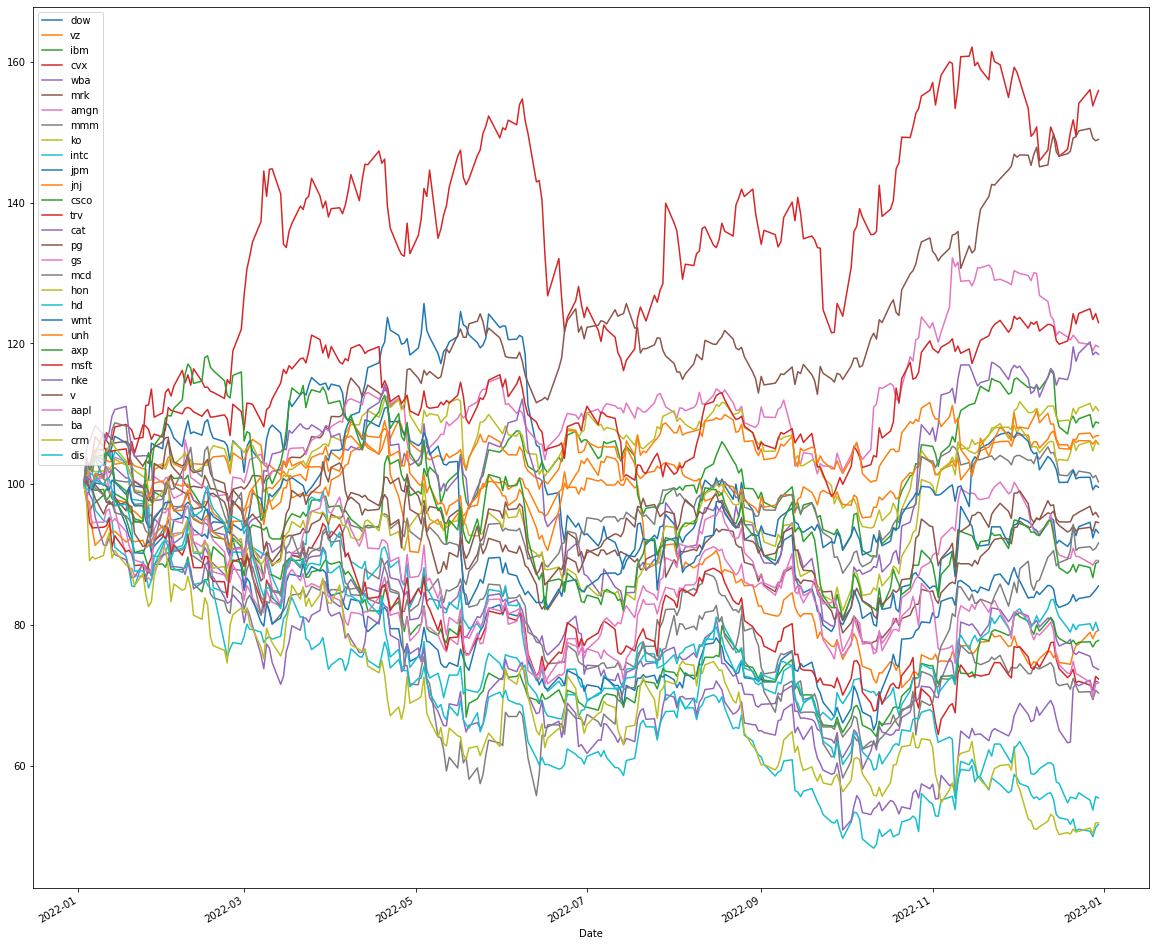

In [4]:
ax = prices.rebase().plot(figsize=(20, 18))

## What is the returns if we buy these stocks in 2022?

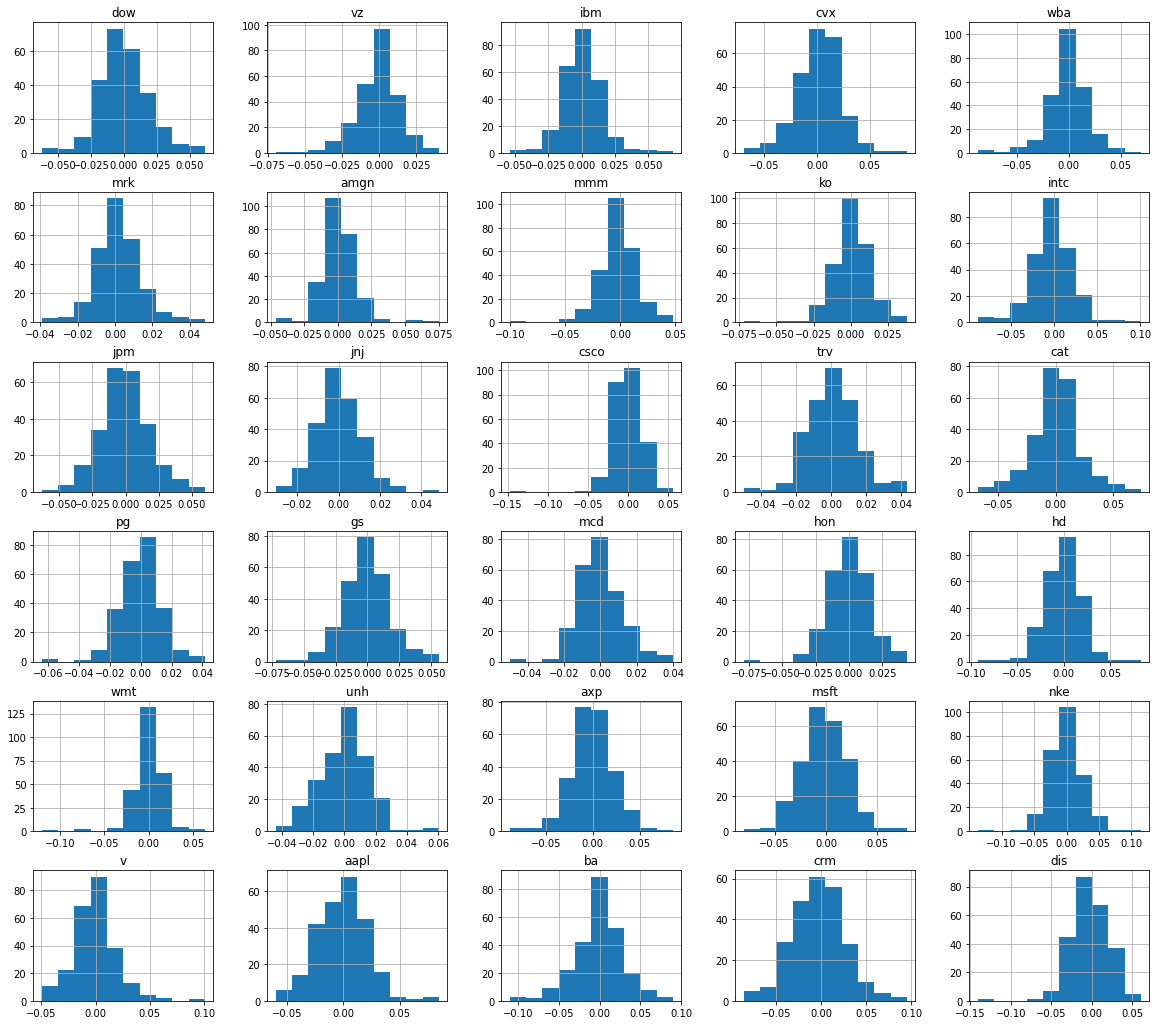

In [5]:
returns = prices.to_log_returns().dropna()
ax = returns.hist(figsize=(20, 18))

## Is this portfolio diversified enough? Let's check the pairwise correlations between assets.

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

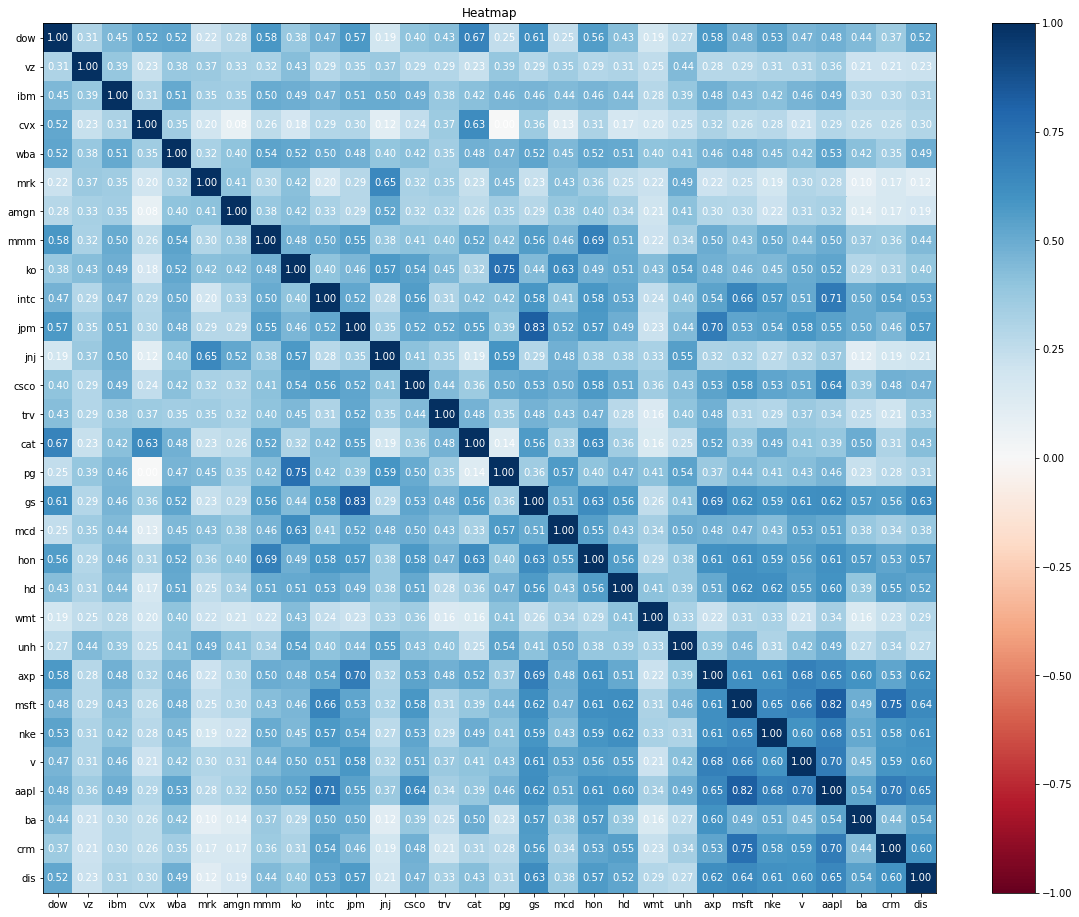

In [6]:
returns.corr()
returns.plot_corr_heatmap(figsize=(20, 16))

## What is the proper weights if we start over in 2022? 

In [7]:
ffn.core.calc_mean_var_weights(returns).as_format('.2%')

dow      0.00%
vz       0.00%
ibm      0.00%
cvx     25.71%
wba      0.00%
mrk     72.18%
amgn     2.11%
mmm      0.00%
ko       0.00%
intc     0.00%
jpm      0.00%
jnj      0.00%
csco     0.00%
trv      0.00%
cat      0.00%
pg       0.00%
gs       0.00%
mcd      0.00%
hon      0.00%
hd       0.00%
wmt      0.00%
unh      0.00%
axp      0.00%
msft     0.00%
nke      0.00%
v        0.00%
aapl     0.00%
ba       0.00%
crm      0.00%
dis      0.00%
dtype: object

## Performance Measurement

In [8]:
performance = prices.calc_stats()
performance.display()

Stat                 dow         vz          ibm         cvx         wba         mrk         amgn        mmm         ko          intc        jpm         jnj         csco        trv         cat         pg          gs          mcd         hon         hd          wmt         unh         axp         msft        nke         v           aapl        ba          crm         dis
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03  2022-01-03

## Show the monthly returns for each stocks

In [9]:
# change all tickers to lower case as ffn used lower case as ticker
dogs_stocks_list = [x.lower() for x in dogs_stocks_list]

for ticker in dogs_stocks_list:
    print(ticker)
    performance[ticker].display_monthly_returns()

dow
  Year    Jan    Feb    Mar    Apr    May     Jun    Jul    Aug     Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  ------  -----  -----  ------  -----  -----  -----  -----
  2022   5.03   -0.1   8.07   4.36   3.29  -24.08    3.1  -2.88  -13.86    6.4  10.59  -1.14  -6.89
vz
  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2022   2.73   0.83  -5.09     -8  10.78  -1.05  -7.84  -9.48  -9.18   0.08   4.31   1.08  -20.75
ibm
  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2022  -1.82  -7.18   6.13   1.68   6.29   1.69  -7.37  -0.55   -7.5   16.4   8.96  -5.38    8.7
cvx
  Year    Jan    Feb    Mar    Apr    May     Jun    Jul    Aug    Sep    Oct    Nov    Dec   

## What is the drawdown of each stocks?

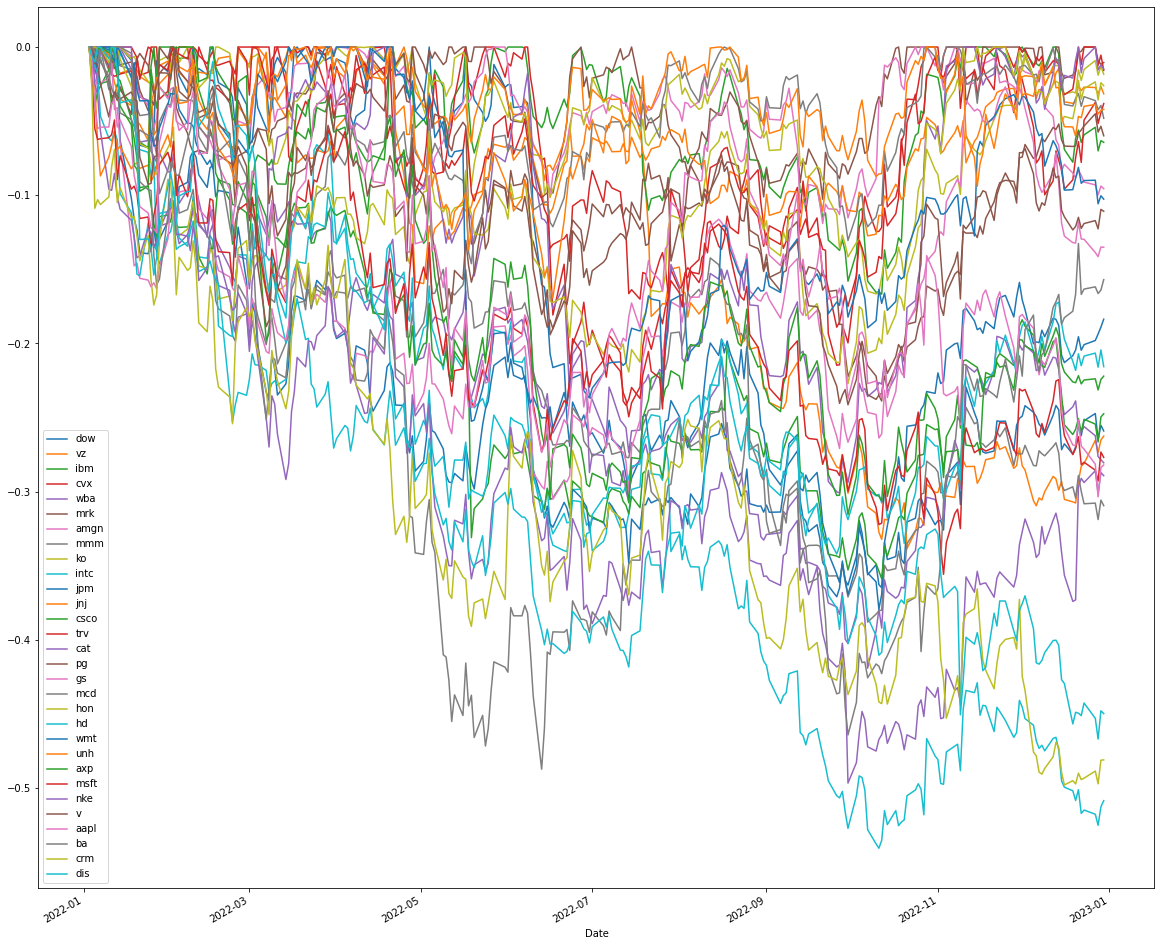

In [10]:
performance = performance.prices.to_drawdown_series().plot(figsize=(20,18))